# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

- The bank marketing dataset used in this assignment represents data collection friom **17 direct marketing campaigns** conducted by a Portugese Bank.


**Understanding of the data, from information in the provided UCI link above:**

- The dataset contains marketing campaign data from Portugese banking institution.
- If focuses on direct phone call based marketing campaigns, aimed at selling 'term deposit products' to clients.

- The data represents 17 marketing campaigns conducted between May 2008 and November 2010, totaling 79,354 contacts with clients.
Source: (CRISP-DM paper)
- Each row represents a single contact with a client during a marketing campaign, containing information about the client, the call and the outcome.
  - Outcome: whether they subscribed to a term deposit or not.

**Types of Variables in the dataset:**
- Client Information:
  - `age`
  - `job`
  - `marital`
  - `education`
  - `default`
  - `housing`
  - `loan`

- Campaign Information:
  - `contact`
  - `month`
  - `day_of_week`
  - `duration`

- Campaign Performance:
  - `pdays`
  - `previous`
  - `poutcome`

- Target Variable:
  - `y` | binary: 'yes' if the client subscribed, 'no' otherwise.


**Size and Structure:**
- `bank-additional-full.csv` has 41,188 rows, including both categorical and numerical variables.


**Target Variable:**
- Target variable is `y` which indicates whether the client subscribed to a term deposit (binary classification: `yes` or `no`).

**Key Observations from the CRISP-DM Paper:**
- Many categorical features such as `job`, `education` need encoding.
- `duration` is highly predicted but only known after the call.
  - It should be used carefully in predictive modeling if realisn is important.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/bank-additional-full.csv', sep = ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**Feature Audit: Missing Values & Data Type Adjustment**

| Feature | Type | Data Type in Pandas | Missing Values? | Needs Coercion? | Notes
|------------------|--------------------------|----------|-------------------------|--------------------|-----------------|
| `age` | Numeric | int64    | No | No |  Fine as is |
| `job` | Categorical | object    | No real NA. Has unknown values. | No |  Can treat unknown as separate category or handle accordingly. |
| `marital` | Categorical | object    | No real NA. Has unknown values. | No |  handle unknows |
| `education` | Categorical | object    | No real NA. Has unknown values. | No |  basic.* can be grouped into 1 level if needed |
| `default` | Categorical | object    | No real NA. Has unknown values. | No |  has a large number of unknowns |
| `housing` | Categorical | object    | No real NA. Has unknown values. | No |  has a large number of unknowns |
| `loan` | Categorical | object    | No real NA. Has unknown values. | No |  has a large number of unknowns |
| `contact` | Categorical | object    | No | No |  Fine as is |
| `month` | Categorical | object    | No | Can map values to numeric, Jan = 1 |  helps with modeling seasonality |
| `day_of_week` | Categorical | object    | No | Can use ordinal encoding |  depends on algorithm |
| `duration` | Numeric | int64    | No | No |  only available post-call |
| `campaign` | Numeric | int64    | No | No |  Fine as is |
| `pdays` | Numeric | int64    | No | Can flag 999 as 'never contacted' |  create binary featue `was_previously_contacted` |
| `previous` | Numeric | int64    | No | No |  Fine as is |
| `poutcome` | Categorical| object   | No | No |  try encoding |
| `emp.var.rate` | Numeric | float64    | No | No |  Fine as is |
| `cons.price.idx` | Numeric | float64   | No | No |  Fine as is |
| `cons.conf.idx` | Numeric | float64    | No | No |  Fine as is |
| `euribor3m` | Numeric | float64    | No | No |  Fine as is |
| `nr.employed` | Numeric | float64    | No | No |  Fine as is |
| `y` (target) | Categorical | object    | No | Can map to 0/1 |  map 'yes' to 1 and 'no' to 0 |

**Notes: Feature Understanding**

- The dataset contains no true `NaN` values, but many categorical fields include the value `"unknown"`, which may represent missing or unavailable data.
- `duration` is known only after a call is completed and directly affects the target variable `y`. Including it can inflate model performance unrealistically. Therefore, it will be excluded from model training for fairness.
- All numerical features are correctly typed.
- The target variable `y` will be mapped to binary (1 for "yes", 0 for "no").
- Optional coercions:
  - Map `month` to numeric values (e.g, jan → 1, feb → 2)
  - Encode `day_of_week` using ordinal or one-hot encoding
  - Add a binary flag for `pdays == 999` to capture clients who were never contacted before

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective**

The goal of this task is to develop a predictive model that accurately determines whether a client will subscribe to a term deposit based on hostorical data from past direct marketing campaigns conducted by a Portugese Bank.


By using classification techniques such as Logistic Regression, K-Nearest Neighbors, Decision Trees and Support Vector Machines, the aim is to:

- Improve targeting efficiency in future marketing efforts.
- Reduce operational costs by focusing on likely responders.
- Minimize client fatigue from unnecessary or repeated calls.
- Ultimately, increase the success rate of term deposit subscriptions.

The predictive model will help the bank make data-driven decisions about whom to contact, when, and under what circumstances, therefore maximizing the return on investment while enhancing customer experience.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

The Bank Client Information features are:

- `age`
- `job`
- `marital`
- `education`
- `default`
- `housing`
- `loan`


and target variable `y`

In [7]:
# Feature Preparation

#Step 1: Select only the bank client features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']
df_bank = df[bank_features].copy()

#Step 2: Encode target variable. Map 0 -> No and 1-> Yes
df_bank['y'] = df_bank['y'].map({'no':0, 'yes':1})

#Step 3: One-hot encoding for categorical values
# drop_first=True avoids dummy variable trap by excluding the first level in each feature.
#numerical value 'age' remains unchanged.
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
df_encoded = pd.get_dummies(df_bank, columns = categorical_features, drop_first=True)

#Step 4: Separate features and target
X = df_encoded.drop('y', axis = 1)
y = df_encoded['y']


#check the result
print("--------X Info---------")
print(X.info())
print("--------X Head---------")
print(X.head())
print("--------Y Value counts---------")
print(y.value_counts())

# check if unknown values exist in important columns
print("--------Unknown Value Counts---------")
print(df_bank[categorical_features].apply(lambda x:(x=='unknown').sum()))

--------X Info---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   job_blue-collar                41188 non-null  bool 
 2   job_entrepreneur               41188 non-null  bool 
 3   job_housemaid                  41188 non-null  bool 
 4   job_management                 41188 non-null  bool 
 5   job_retired                    41188 non-null  bool 
 6   job_self-employed              41188 non-null  bool 
 7   job_services                   41188 non-null  bool 
 8   job_student                    41188 non-null  bool 
 9   job_technician                 41188 non-null  bool 
 10  job_unemployed                 41188 non-null  bool 
 11  job_unknown                    41188 non-null  bool 
 12  marital_married                41188 non-null  boo

#### Handling 'unknown' Values

- Several features contain the category 'unknown', including `default`, `education`, and `loan`.
  - Not ideal to drop unknowns in `default`, as unknown values are too many (~20%).
- Instead of dropping these rows or imputing values without strong justification, values can be retained under the 'unknown' category for each feature.
- This preserves data volume and may even offer predictive insight (e.g, clients unwilling to disclose financial info may behave differently).

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y    #ensures target class proportions are preserved
)

#confirm the shape of splits
print("~~~~~~~~~~~~~~~Train-Test Split~~~~~~~~~~~~~")
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

#confirm class balance
print("~~~~~~~~~~~~~~~Class Balance~~~~~~~~~~~~~")
print("Training target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))

~~~~~~~~~~~~~~~Train-Test Split~~~~~~~~~~~~~
Training set: (32950, 28) (32950,)
Test set: (8238, 28) (8238,)
~~~~~~~~~~~~~~~Class Balance~~~~~~~~~~~~~
Training target distribution:
y
0    0.887344
1    0.112656
Name: proportion, dtype: float64

Test target distribution:
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


**Train-Test Split**

The dataset was split into training and test sets using an 80/20 ratio with stratified sampling on the target variable `y` to preserve the class distribution.

- **Training set size:** 80%
- **Test set size:** 20%
- **Stratification:** Yes (on `y`)
  - Because your target (y) is imbalanced (~88% no, ~12% yes), stratification ensures both train and test sets maintain this proportion by avoiding bias in evaluation.

This setup ensures a representative evaluation of model performance on unseen data.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

**Stratified Random Classifier**

- Predicts based on the class distribution in the training set (88% -> 0 , 12% -> 1)
- Randomly assigns labels based on that distribution
- Use DummyClassifier('strategy = 'stratified')
- Useful to show why random guessing doesn't help even if it respects class proportions.

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
# Initialize DummyClassifier with stratified strategy
dummy_stratified = DummyClassifier(strategy='stratified', random_state=42)
dummy_stratified.fit(X_train, y_train)

# Make predictions on test data set
y_pred_dummy = dummy_stratified.predict(X_test)

#Evaluate
print("Startified Dummy Classifier Performance:\n")
print("Accuracy Score:", accuracy_score(y_test, y_pred_dummy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dummy))

Startified Dummy Classifier Performance:

Accuracy Score: 0.803714493809177
Confusion Matrix:
 [[6510  800]
 [ 817  111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7310
           1       0.12      0.12      0.12       928

    accuracy                           0.80      8238
   macro avg       0.51      0.51      0.51      8238
weighted avg       0.80      0.80      0.80      8238



- The accuracy score: 80.4% looks good, but this is misleading due to class imbalance.
- The confusion matrix shows 817 false negatives and 800 false positives.
  - which means the model is making mistakes.
  - the model failed to meaningfully identify true positives (class 1).
- The precision score for Class (1) shows that, of all predicted "yes", only 12% were correct.
- The recall score for Class (1) shows that, only 12% of actual "yes" cases were caught.
- The F1 score for Class (1) shows a poor balance of precision and recall.
- The macro avg F1 shows that, it gives equal weights to both Classes (0) and (1), which shows imbalance more claerly.
- These insights reinforce that the accuracy is not enough, especially when Class (1) is the primary business interest.


This highlights the **importance of recall, precision, and F1-score** over accuracy alone in imbalanced classification problems.


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# Initialize model
logr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42, class_weight='balanced')

# Train
logr.fit(X_train,y_train)

# Predict
y_pred_logr = logr.predict(X_test)

**Logistic Regression Model**

Trained a Logistic Regression model using all encoded client information features.

- The solver `liblinear` was selected due to small-to-medium sized dataset.
- Set `max_iter=1000` to ensure convergence during training.
- Model performance is compared to the stratified baseline to assess its ability to correctly predict positive term deposit subscriptions.

- Evaluation metrics such as **precision**, **recall**, **F1-score**, and **confusion matrix** are used to interpret performance beyond accuracy due to class imbalance.


- Without `class_weight='balanced'`, the model predicted only class 0 (all 'no').
  - so there were no predicted positives to calculate precision/recall/F1 score for class 1.
  - this is expected in imbalanced datasets, where Logistic Regression becomes too conservative and acoids predicting the minority class.

- Therefore after applying `class_weight='balanced'` in the Logistic Regression model, it adjusted the model to give more importance to the minority class ('yes') and improved recall and F1-score for positive predictions.

### Problem 9: Score the Model

What is the accuracy of your model?

In [16]:
# Evaluate Logistic Regression Model Performance
print("Logistic Regression Classifier Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_logr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logr))

Logistic Regression Classifier Performance:

Accuracy: 0.5846079145423646
Confusion Matrix:
 [[4238 3072]
 [ 350  578]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.71      7310
           1       0.16      0.62      0.25       928

    accuracy                           0.58      8238
   macro avg       0.54      0.60      0.48      8238
weighted avg       0.84      0.58      0.66      8238



**Logistic Regression - Results Analysis**

- Confusion Matrix is now catching more "yes" cases, 578 vs 111 (from stratified dummy classifer).
  - the false positives (3072) are high, which is why the precision is low(16%) for class 1.

- Recall Score:
  - Increased from 0.12 to 0.62 for Class (1).
  - Shows 62% for Class (1) - which is important from business point of view, as
  it is better to call a few customers who might not subscribe instead of missing a potential customer.

- F1 Score:
  - Improved from 0.12 to 0.25 for Class (1).

- Accuracy:
  - Dropped from 0.80(Dummy Classifier) to 0.58, but this is expected in imbalanced classification tasks.

The trade-off shows that **Logistic Regression model is now identifying meaningful positive cases** which is essential for the bank's goal of efficiently targeting potential subscribers to term deposits.

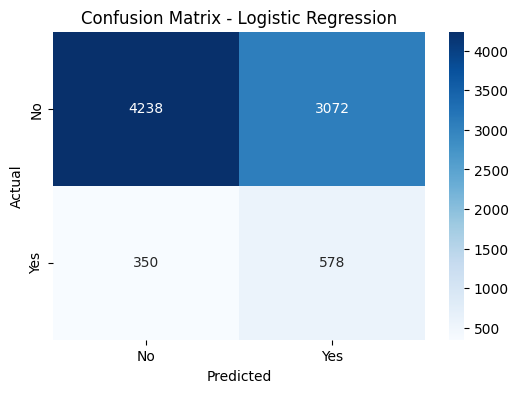

In [17]:
# Plot the confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logr), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

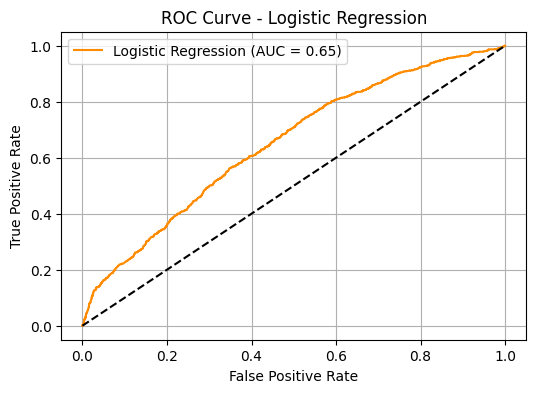

In [18]:
# plot the ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities for class 1
y_probs = logr.predict_proba(X_test)[:,1]

#ROC curve values
fpr, tpr,thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# plot
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label = f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

**ROC -> Receiver Operating Characteristic Curve**

- ROC is a graph that shows how well the classifier distinguishes between the two classes (yes/no) across different cutoffs.
  - X-axis: False Positive Rate(FPR)
    - How many "no" clients were incorrectly predicted as "yes"
  - Y-axis: True Positive Rate(TPR)
    - How many actual "yes" clients were correctly predicted.


**AUC -> Area Under ROC Curve"**

- It gives a single number to measure how good the model is at separating the two classes:
  - 0.5 : Bad model (no better than random guessing)
  - 0.6 - 0.7 : Fair, better than random
  - 0.7 - 0.8 : Good separation
  - 0.8 - 0.9 : Very good
  - 0.9 - 1.0 : Excellent model


**ROC Curve analysis**

The ROC Curve shows the trade-off between the True Positive Rate(recall) and the False Positive Rate at various classification thresholds

- The AUC for the above Logistic Regression model is **0.65**.
- this indicates a **fair** ability to distinguish between clients who will subscribe to a term deposit and those who won't.
- The model is not perfect, but performs better than random guessing (AUC = 0.5) and further improvement is possible with additional features or model tuning.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [20]:
# initialize models
models = {
    'Logistic Regression': logr,
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

results = []

# Train and evaluate each model
for name, model in models.items():
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()

  train_time = round(end_time - start_time, 4)
  train_accuracy = accuracy_score(y_train, model.predict(X_train))
  test_accuracy = accuracy_score(y_test, model.predict(X_test))

  results.append({
      'Model': name,
      'Train Time(s)': train_time,
      'Train Accuracy': round(train_accuracy,4),
      'Test Accuracy': round(test_accuracy,4)
  })


# Create DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Train Time(s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.1593,0.5908,0.5846
1,KNN,0.0188,0.8907,0.8787
2,Decision Tree,0.2047,0.9171,0.8637
3,SVM,21.2532,0.8873,0.8874


- **SVM** had the best overall test performance, though it was the slowest to train
- **KNN and Decision Trees** both performed well but may be **overfitting** based on the gap between training and test accuracy.
- **Logistic Regression**, though fastest, struggled due to class imblance and linear limitations.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights' : ['uniform', 'distance']
}

knn_grid = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best Parameters:", knn_grid.best_params_)
print("Best Score(F1):", knn_grid.best_score_)

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Score(F1): 0.16074401185416548


In [24]:
# Best KNN from GridSearchCV
best_knn = knn_grid.best_estimator_


#Predict on test set
y_pred_knn = best_knn.predict(X_test)
y_probs_knn = best_knn.predict_proba(X_test)[:,1]

#Evaluate
print("Tuned KNN Classifier Performance on Test Set:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Tuned KNN Classifier Performance on Test Set:

Accuracy: 0.8594319009468318
Confusion Matrix:
 [[6962  348]
 [ 810  118]]
ROC-AUC: 0.5678375159205624

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      7310
           1       0.25      0.13      0.17       928

    accuracy                           0.86      8238
   macro avg       0.57      0.54      0.55      8238
weighted avg       0.82      0.86      0.84      8238



In [28]:
#Decision Tree Tuning
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1',
    n_jobs=-1)

grid_dt.fit(X_train, y_train)

print("Best Parameters:", grid_dt.best_params_)
print("Best Score(F1):", grid_dt.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best Score(F1): 0.2563373794564767


In [29]:
#Evaluate Decision Tree on Test Set

#get the best model
best_dt = grid_dt.best_estimator_

#predict
y_pred_dt = best_dt.predict(X_test)
y_probs_dt = best_dt.predict_proba(X_test)[:,1]

#Evaluate
print("Tuned Decision Tree Classifier Performance on Test Set:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Tuned Decision Tree Classifier Performance on Test Set:

Accuracy: 0.6479728089342073
Confusion Matrix:
 [[4841 2469]
 [ 431  497]]
ROC-AUC: 0.6381110989905184

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77      7310
           1       0.17      0.54      0.26       928

    accuracy                           0.65      8238
   macro avg       0.54      0.60      0.51      8238
weighted avg       0.83      0.65      0.71      8238



In [27]:
#Linear SVM with Class Weighting

svm_linear = SVC(kernel='linear', class_weight='balanced', probability=False, random_state=42)

svm_linear.fit(X_train, y_train)

y_pred_svm_linear = svm_linear.predict(X_test)

print("Linear SVM Classifier Performance on Test Set:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_linear))

Linear SVM Classifier Performance on Test Set:

Accuracy: 0.6069434328720563
Confusion Matrix:
 [[4458 2852]
 [ 386  542]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.61      0.73      7310
           1       0.16      0.58      0.25       928

    accuracy                           0.61      8238
   macro avg       0.54      0.60      0.49      8238
weighted avg       0.83      0.61      0.68      8238



**Final Model Comparison - Focus on Class 1 Recall**

| Model                          | Accuracy | Recall (1) | Precision (1) | F1-score (1) | ROC-AUC |
|-------------------------------|----------|------------|----------------|--------------|----------|
| Logistic Regression (balanced)| 0.5846   | 0.62       | 0.16           | 0.25         | 0.65     |
| Linear SVM (balanced)         | 0.6069   | 0.58       | 0.16           | 0.25         | N/A      |
| KNN (tuned)                   | 0.8594   | 0.13       | 0.25           | 0.17         | 0.5678   |
| Decision Tree (tuned, balanced)| 0.6480  | 0.54       | 0.17           | **0.26**     | 0.6381   |

**Recommendation**:
- For this imbalanced classification task, the **tuned Decision Tree with `class_weight='balanced'`** provided the best overall performance:

  - It achieved the **highest F1-score (0.26)** for the minority class (`yes`) while maintaining strong recall (0.54).
  - It is also **fast to train**, **interpretable**, and suitable for production deployment in a business setting.

- While **Logistic Regression** and **Linear SVM** with class weighting also performed well, especially in terms of recall, the Decision Tree **offered a better balance between precision and recall**, making it the most effective model for identifying potential term deposit subscribers.

- Other models like **KNN**, despite high overall accuracy, underperformed on recall and F1-score for the minority class, making them less suitable for this specific business goal.

#### Final Summary

- In this assignment, four classification models were explored to predict whether a client would subscribe to a term deposit, using data from a Portuguese bank's marketing campaigns.
- Given the imbalanced nature of the dataset (~88% "no", ~12% "yes"), the evaluation went beyond accuracy and focused on metrics like **recall**, **F1-score**, and **ROC-AUC**, especially for the minority class ("yes").

#### Models Evaluated:
- **Logistic Regression (class_weight='balanced')**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree (tuned with class_weight='balanced')**
- **Support Vector Machine (Linear SVM, class_weight='balanced')**

#### Key Findings:
- After hyperparameter tuning and class weighting, the **Decision Tree** outperformed all other models in terms of **F1-score for the minority class**, making it the most effective at balancing precision and recall.
- **Logistic Regression** and **Linear SVM** also performed well, particularly in recall, and remain strong alternatives due to their simplicity and speed.
- **KNN**, while achieving high overall accuracy, failed to detect a meaningful number of true positives.
- Feature imbalance, categorical encoding, and threshold sensitivity significantly affected performance across models.

#### Recommendation:
- Use the **tuned Decision Tree with class_weight='balanced'** for production deployment. It achieved the best balance between recall and precision for identifying likely term deposit subscribers and offers clear interpretability for business stakeholders.
- **Logistic Regression** and **Linear SVM** are recommended as fast, reliable backups when model simplicity or inference speed is prioritized.

##### Questions